<a href="https://colab.research.google.com/github/NahuelCostaCortez/taller-IA/blob/main/2_HuggingFacePipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**🤗 HUGGINGFACE TRANSFORMERS AND PIPELINE**

HuggingFace ofrece la librería ***Transformers*** con la que se pueden utilizar grandes modelos de lenguaje pre-entrenados

La herramienta [***pipeline***](https://https://huggingface.co/docs/transformers/main_classes/pipelines) permite utilizar la librería de forma sencilla abstrayéndose de la mayor parte del código.

## Instalar las librerías necesarias

In [ ]:
!pip install transformers
!pip install transformers[sentencepiece]

  Using cached transformers-4.18.0-py3-none-any.whl (4.0 MB)
  Using cached regex-2022.10.31-cp36-cp36m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (756 kB)
  Using cached huggingface_hub-0.4.0-py3-none-any.whl (67 kB)
  Using cached sacremoses-0.0.53-py3-none-any.whl
  Using cached tokenizers-0.12.1-cp36-cp36m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (6.6 MB)
  Using cached sentencepiece-0.1.98-cp36-cp36m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)


In [ ]:
from transformers import pipeline

## Ejemplos

Como argumento a pipeline se le pasa la tarea a resolver.

Las tareas permitidas son:

- "audio-classification"
- "automatic-speech-recognition"
- "conversational"
- "feature-extraction"
- "fill-mask"
- "image-classification"
- "question-answering"
- "table-question-answering"
- "text2text-generation"
- "text-classification" (alias "sentiment-analysis" available)
- "text-generation"
- "token-classification" (alias "ner" available)
- "translation"
- "translation_xx_to_yy"
- "summarization"
- "zero-shot-classification"


Lo más práctico es ir a [tareas](https://https://huggingface.co/tasks), elegir la que se desee y consultar cómo utilizar los modelos pertenecientes a la tarea seleccionada

**Ejemplo para clasificación**

In [ ]:
pipe = pipeline("text-classification")
pipe("I love this song so much!")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


[2023-04-19 16:10:37.384 1-8-1-cpu-py36-ml-m5-large-54a03ac1ed43c39bb0b8d2777d5a:32 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-04-19 16:10:37.445 1-8-1-cpu-py36-ml-m5-large-54a03ac1ed43c39bb0b8d2777d5a:32 INFO profiler_config_parser.py:102] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.


[{'label': 'POSITIVE', 'score': 0.9998823404312134}]

Por defecto cada tarea tiene asociado un modelo. Si se desea utilizar un [modelo determinado](https://huggingface.co/models?pipeline_tag=text-classification), se puede especificar en los argumentos.

In [ ]:
pipe = pipeline("text-classification", model="roberta-large-mnli")
pipe("I love this song so much!")

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

[{'label': 'NEUTRAL', 'score': 0.6192833185195923}]

**Ejemplo para traducción**

Al elegir *traducción*, dentro de la [carta](https://huggingface.co/tasks/translation) se puede ver lo siguiente:

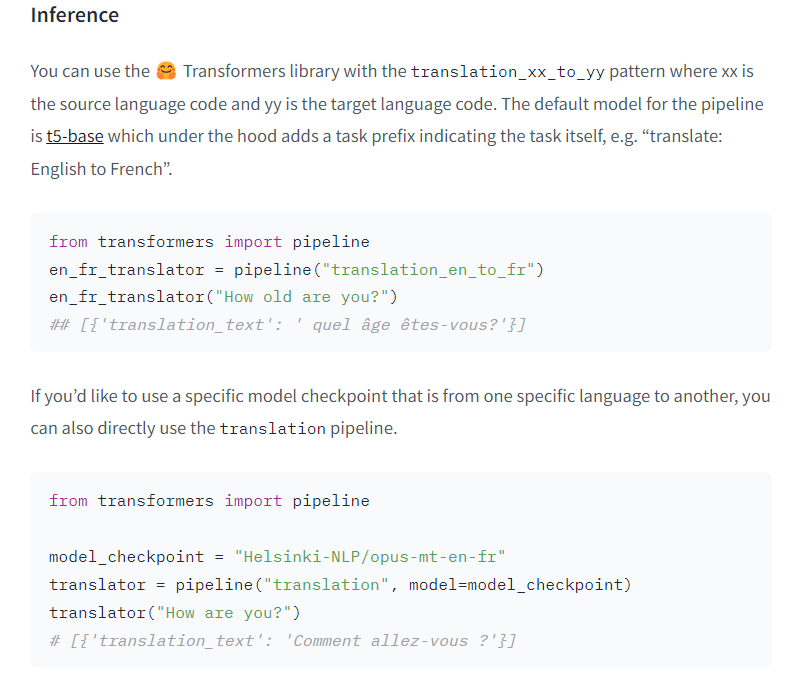

que indica cómo utilizar un modelo diferente al de por defecto. Si entramos a la [carta del modelo ](https://huggingface.co/Helsinki-NLP/opus-mt-es-en) en el botón de *Use in Transformers* se puede copiar directamente el código para utilizar el modelo.


En este caso también es necesario cargar el tokenizer, que se encarga de procesar el texto para pasárselo al modelo.

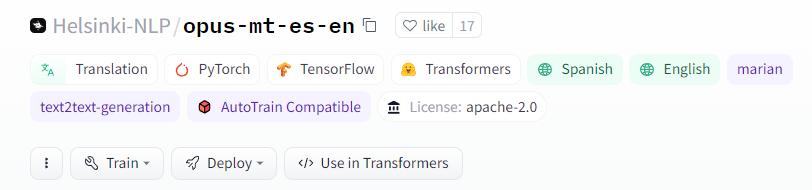

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-es")
model_spanish = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-es")
translator = pipeline("translation", model=model_spanish, tokenizer=tokenizer)
translator("I love this song so much!")

Downloading:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/783k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/807k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/298M [00:00<?, ?B/s]

[{'translation_text': '¡Me encanta esta canción!'}]

In [ ]:
article_text = """Videos that say approved vaccines are dangerous and cause autism, cancer or infertility are among those that will be taken down, the company said.  The policy includes the termination of accounts of anti-vaccine influencers.  Tech giants have been criticised for not doing more to counter false health information on their sites.  In July, US President Joe Biden said social media platforms were largely responsible for people's scepticism in getting vaccinated by spreading misinformation, and appealed for them to address the issue.  YouTube, which is owned by Google, said 130,000 videos were removed from its platform since last year, when it implemented a ban on content spreading misinformation about Covid vaccines.  In a blog post, the company said it had seen false claims about Covid jabs "spill over into misinformation about vaccines in general". The new policy covers long-approved vaccines, such as those against measles or hepatitis B.  "We're expanding our medical misinformation policies on YouTube with new guidelines on currently administered vaccines that are approved and confirmed to be safe and effective by local health authorities and the WHO," the post said, referring to the World Health Organization."""
translator(article_text)

[{'translation_text': 'Los videos que dicen que las vacunas aprobadas son peligrosas y causan autismo, cáncer o infertilidad están entre los que serán eliminados, dijo la compañía. La política incluye la terminación de cuentas de influencers antivacunadores. Los gigantes de la tecnología han sido criticados por no hacer más para contrarrestar la información falsa sobre salud en sus sitios. En julio, el presidente de EE.UU. Joe Biden dijo que las plataformas de medios sociales fueron en gran parte responsables del escepticismo de las personas al vacunarse mediante la difusión de información errónea, y les pidió que abordaran el problema. YouTube, que es propiedad de Google, dijo que 130.000 videos fueron retirados de su plataforma desde el año pasado, cuando implementó una prohibición de difundir información errónea sobre las vacunas de Covid. En un artículo de blog, la compañía dijo que había visto afirmaciones falsas sobre Covid jabs "introducir información errónea sobre vacunas en ge

**Ejemplo de chatbot**

In [ ]:
from transformers import Conversation
pipe = pipeline("conversational")

No model was supplied, defaulted to microsoft/DialoGPT-medium (https://huggingface.co/microsoft/DialoGPT-medium)


Downloading:   0%|          | 0.00/642 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/823M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

In [ ]:
conversation_1 = Conversation("What is Artificial Intelligence?")
conversation_2 = Conversation("What's the last book you have read?")
pipe([conversation_1, conversation_2])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[Conversation id: 60192bd0-20e9-4b9a-b64a-d19ceb4e3d02 
 user >> What is Artificial Intelligence? 
 bot >> It's a new game from the makers of the original Star Wars. ,
 Conversation id: c0058d04-bad6-4b46-b71d-564b53b31052 
 user >> What's the last book you have read? 
 bot >> The Last Question ]

**Ejemplo de Question answering**


In [ ]:
nlp = pipeline(
    'question-answering', 
    model='mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es',
    tokenizer=(
        'mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es',  
        {"use_fast": False}
    )
)

context = "Notion es una herramienta de productividad y gestión de proyectos que permite crear, organizar y colaborar en una amplia variedad de contenidos digitales, como notas, bases de datos, calendarios, listas de tareas, documentos, wikis, y más. Notion se puede utilizar para gestionar tareas individuales, proyectos en equipo, y para organizar información de forma personalizada en una interfaz visual y flexible. Notion proporciona una interfaz de arrastrar y soltar, lo que facilita la creación y organización de contenidos de manera intuitiva. Los usuarios pueden crear páginas y bases de datos, y luego agregar elementos como texto, imágenes, listas, tablas, archivos adjuntos y enlaces a otros contenidos internos o externos. Además, Notion permite colaborar en tiempo real con otros usuarios, lo que facilita el trabajo en equipo y la gestión de proyectos colaborativos. Una de las características destacadas de Notion es su capacidad de adaptarse a diferentes casos de uso, desde la gestión personal de tareas y notas, hasta la organización de proyectos complejos de equipos, la creación de documentación y wikis, o incluso la creación de sitios web simples. Notion también es conocido por su flexibilidad y personalización, lo que permite a los usuarios adaptar la herramienta a sus necesidades específicas utilizando plantillas, fórmulas, integraciones y otros elementos personalizados. Notion está disponible en versiones gratuitas y de pago, con planes para individuos, equipos y empresas, y se puede acceder a través de aplicaciones web, aplicaciones de escritorio y aplicaciones móviles en diferentes plataformas." # ELEGIR TEXTO

nlp(
    {
        'question': 'qué es Notion?', # ELEGIR PREGUNTA
        'context': context
    }
)

Downloading:   0%|          | 0.00/465 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/419M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/135 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/237k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

{'score': 0.3328027129173279,
 'start': 29,
 'end': 65,
 'answer': 'productividad y gestión de proyectos'}

**Ejemplo de resumen de texto**

In [ ]:
import re
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

Entre los modelos disponibles para summarization en español elegimos [mT5-m2m-CrossSum](https://huggingface.co/csebuetnlp/mT5_m2m_crossSum) y copiamos el ejemplo de código que proporcionan:

In [ ]:
import re
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

WHITESPACE_HANDLER = lambda k: re.sub('\s+', ' ', re.sub('\n+', ' ', k.strip()))

article_text = """Los vídeos que afirman que las vacunas aprobadas son peligrosas y causan autismo, cáncer o infertilidad son algunos de los que se retirarán, según la empresa.  La política incluye la cancelación de cuentas de influencers antivacunas.  Los gigantes tecnológicos han sido criticados por no hacer más para contrarrestar la información sanitaria falsa en sus sitios web.  En julio, el Presidente de Estados Unidos, Joe Biden, afirmó que las plataformas de medios sociales eran responsables en gran medida del escepticismo de la gente a la hora de vacunarse, al difundir información errónea, e hizo un llamamiento para que abordaran el problema.  YouTube, propiedad de Google, declaró que se habían eliminado 130.000 vídeos de su plataforma desde el año pasado, cuando prohibió los contenidos que difundían información errónea sobre las vacunas Covid.  En una entrada de su blog, la empresa afirmó que había visto cómo las afirmaciones falsas sobre las vacunas Covid "se extendían a la desinformación sobre las vacunas en general". La nueva política cubre vacunas aprobadas desde hace tiempo, como las del sarampión o la hepatitis B. "Estamos ampliando nuestras políticas de desinformación médica en YouTube con nuevas directrices sobre vacunas administradas actualmente, cuya seguridad y eficacia han sido aprobadas y confirmadas por las autoridades sanitarias locales y la OMS", decía el post, en referencia a la Organización Mundial de la Salud."""

model_name = "csebuetnlp/mT5_multilingual_XLSum"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

input_ids = tokenizer(
    [WHITESPACE_HANDLER(article_text)],
    return_tensors="pt",
    padding="max_length",
    truncation=True,
    max_length=512
)["input_ids"]

output_ids = model.generate(
    input_ids=input_ids,
    max_length=84,
    no_repeat_ngram_size=2,
    num_beams=4
)[0]

summary = tokenizer.decode(
    output_ids,
    skip_special_tokens=True,
    clean_up_tokenization_spaces=False
)

print(summary)

Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/730 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.11M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.17G [00:00<?, ?B/s]